<center><b>In the name of God</b></center>

<b>Course</b>: Statistical Pattern Recognition
<br>
<b>Description:</b> HomeWork 3 | Question 4
<br>
<b>Developer</b>: Alireza Mazochi (400131075)

# Libraries

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# a

In [2]:
def patch_extract(data):
    columns = []
    for i in range(0, data.shape[0], 8):
        for j in range(0, data.shape[1], 8):
            patch = data[i:i+8, j: j+8]
            columns.append(patch.ravel())
    return np.column_stack(columns)

In [3]:
def load_image(filename) :
    img = Image.open(filename).convert("L")
    img.load()
    data = np.asarray(img, dtype="int32" )
    return data

In [4]:
data_img = load_image("./donald.png")

In [5]:
data_patch = patch_extract(data_img)

# b

In [6]:
data_patch_mean = np.mean(data_patch, axis=1)
data_patch_mean = data_patch_mean[:, np.newaxis]

In [7]:
data_patch_normal = data_patch - data_patch_mean

In [8]:
data_patch_cov = np.cov(data_patch_normal)

In [9]:
e_values, e_vectors = np.linalg.eig(data_patch_cov)

idx = e_values.argsort()[::-1]   
e_values = e_values[idx]
e_vectors = e_vectors[:,idx]

In [10]:
for i in range(20):
    print(f"Eigen Value = {e_values[i].round(decimals=2)} Eigen Vector = ")
    print(e_vectors[:,i].round(decimals=2))
print()

Eigen Value = 174662.95 Eigen Vector = 
[-0.12 -0.12 -0.12 -0.12 -0.12 -0.12 -0.12 -0.12 -0.12 -0.12 -0.13 -0.13
 -0.13 -0.12 -0.12 -0.12 -0.12 -0.13 -0.13 -0.13 -0.13 -0.13 -0.13 -0.12
 -0.12 -0.13 -0.13 -0.13 -0.13 -0.13 -0.13 -0.12 -0.12 -0.13 -0.13 -0.13
 -0.13 -0.13 -0.13 -0.12 -0.12 -0.13 -0.13 -0.13 -0.13 -0.13 -0.13 -0.12
 -0.12 -0.12 -0.13 -0.13 -0.13 -0.13 -0.13 -0.12 -0.12 -0.12 -0.13 -0.13
 -0.13 -0.13 -0.12 -0.12]
Eigen Value = 4224.48 Eigen Vector = 
[ 0.1   0.06  0.01 -0.05 -0.1  -0.14 -0.17 -0.2   0.12  0.08  0.03 -0.03
 -0.09 -0.14 -0.17 -0.2   0.15  0.11  0.05 -0.01 -0.07 -0.12 -0.17 -0.19
  0.18  0.13  0.08  0.01 -0.05 -0.11 -0.15 -0.18  0.2   0.16  0.1   0.04
 -0.03 -0.09 -0.13 -0.16  0.21  0.18  0.12  0.06 -0.   -0.06 -0.11 -0.15
  0.21  0.19  0.14  0.08  0.02 -0.04 -0.09 -0.13  0.21  0.19  0.15  0.1
  0.04 -0.01 -0.06 -0.1 ]
Eigen Value = 3226.94 Eigen Vector = 
[-0.22 -0.22 -0.21 -0.19 -0.17 -0.14 -0.11 -0.09 -0.19 -0.2  -0.18 -0.16
 -0.14 -0.11 -0.08 -0.06 -0.15

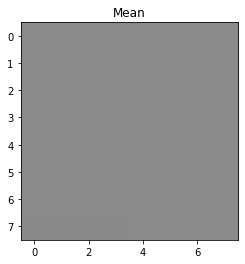

In [11]:
plt.imshow(data_patch_mean.reshape(8,8),vmin=0 , vmax=255, cmap='gray')
plt.title("Mean")
plt.show()

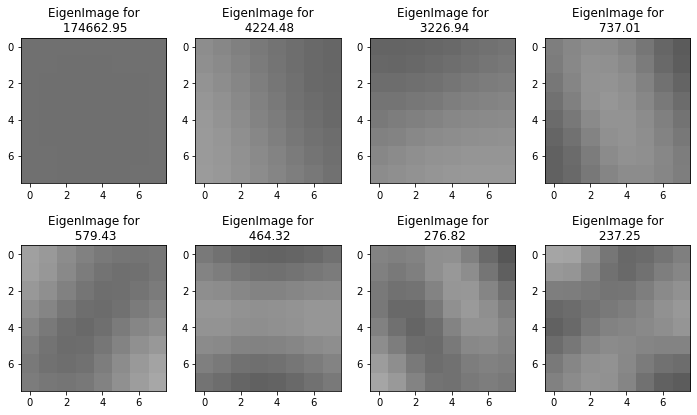

In [12]:
fig, ax = plt.subplots(2, 4)
for i in range(8):
    ax[int(i/4)][i%4].imshow(e_vectors[:,i].reshape(8,8), vmin=-1, vmax=+1, cmap='gray')
    ax[int(i/4)][i%4].set_title(f"EigenImage for\n {e_values[i].round(2)}")
fig.set_size_inches(12,7)    
plt.show()

# c, d, e

In [14]:
def patch_reconstruct(data_patch_normal, data_shape):
    data_reconstructed = np.zeros(data_shape)
    counter = 0
    for i in range(0, data_shape[0], 8):
        for j in range(0, data_shape[1], 8):
            data_reconstructed[i:i+8,j:j+8] = data_patch_normal[:,counter].reshape(8, 8)
            counter += 1
    
    return data_reconstructed

In [15]:
data_patch_transformed = np.linalg.inv(e_vectors) @ data_patch_normal 

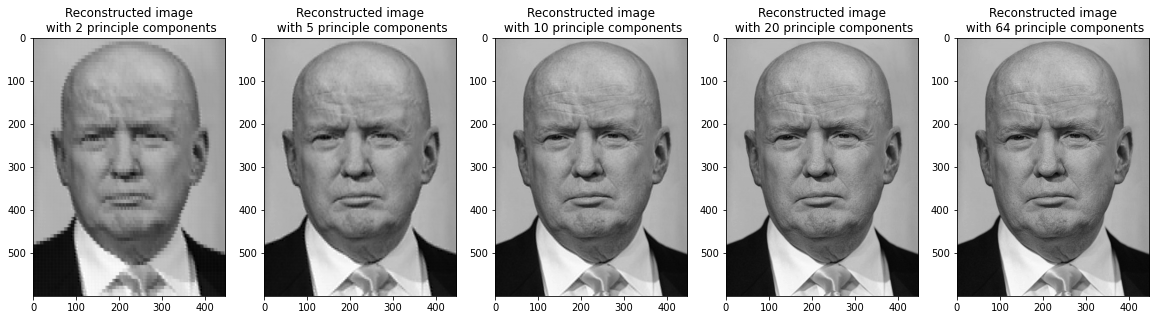

In [16]:
fig, ax = plt.subplots(1, 5)
for i, k in enumerate([2, 5, 10, 20, 64]):
    # c
    data_patch_redueced = data_patch_transformed[:k,:]
    
    # d
    data_patch_reconstructed = e_vectors[:, :k] @ data_patch_redueced + data_patch_mean
    
    # e
    data_img_reconstructed = patch_reconstruct(data_patch_reconstructed, (600, 448))
    
    ax[i].imshow(data_img_reconstructed, vmin=0 , vmax=255, cmap='gray')
    ax[i].set_title(f"Reconstructed image\n with {k} principle components")

fig.set_size_inches(20,50)
plt.show()
    
    

# f

In [17]:
def load_image_rgb(filename) :
    img = Image.open(filename)
    img.load()
    img_rgb = img.split()
    
    data = [np.asarray(img_rgb[i], dtype="int32" ) for i in range(3)]
    
    return data

In [18]:
data_img = load_image_rgb("./joe.png")

In [20]:
data_patch_transformed_list = []
e_values_list = []
e_vectors_list = []
data_patch_mean_list = []

data_img_shape = data_img[0].shape
data_img_shape = (8*int(data_img_shape[0]/8), 8*int(data_img_shape[1]/8))

for channel in range(3):

    data_patch = patch_extract(data_img[channel][:data_img_shape[0], :data_img_shape[1]])

    data_patch_mean = np.mean(data_patch, axis=1)
    data_patch_mean = data_patch_mean[:, np.newaxis]
    data_patch_normal = data_patch - data_patch_mean
    data_patch_cov = np.cov(data_patch_normal)
    e_values, e_vectors = np.linalg.eig(data_patch_cov)

    idx = e_values.argsort()[::-1]   
    e_values = e_values[idx]
    e_vectors = e_vectors[:,idx]

    data_patch_transformed = np.linalg.inv(e_vectors) @ data_patch_normal 

    data_patch_transformed_list.append(data_patch_transformed)
    e_values_list.append(e_values)
    e_vectors_list.append(e_vectors)
    data_patch_mean_list.append(data_patch_mean)

In [21]:
for j, color in enumerate(["Red", "Green", "Blue"]):
    print(f"Color = {color}")
    for i in range(20):
        print(f"Eigen Value = {e_values_list[j][i].round(decimals=2)} Eigen Vector = ")
        print(e_vectors_list[j][:,i].round(decimals=2))
    print()

Color = Red
Eigen Value = 451809.45 Eigen Vector = 
[-0.12 -0.12 -0.13 -0.13 -0.13 -0.13 -0.12 -0.12 -0.12 -0.12 -0.13 -0.13
 -0.13 -0.13 -0.12 -0.12 -0.12 -0.13 -0.13 -0.13 -0.13 -0.13 -0.13 -0.12
 -0.12 -0.13 -0.13 -0.13 -0.13 -0.13 -0.13 -0.12 -0.12 -0.13 -0.13 -0.13
 -0.13 -0.13 -0.13 -0.12 -0.12 -0.12 -0.13 -0.13 -0.13 -0.13 -0.12 -0.12
 -0.12 -0.12 -0.13 -0.13 -0.13 -0.12 -0.12 -0.12 -0.12 -0.12 -0.12 -0.12
 -0.12 -0.12 -0.12 -0.12]
Eigen Value = 5085.69 Eigen Vector = 
[-0.16 -0.12 -0.07 -0.02  0.04  0.09  0.14  0.17 -0.18 -0.13 -0.07 -0.02
  0.03  0.09  0.15  0.18 -0.18 -0.14 -0.08 -0.02  0.03  0.1   0.15  0.19
 -0.19 -0.15 -0.09 -0.03  0.03  0.1   0.15  0.19 -0.19 -0.15 -0.1  -0.04
  0.02  0.09  0.15  0.19 -0.18 -0.15 -0.1  -0.04  0.02  0.09  0.15  0.19
 -0.18 -0.15 -0.1  -0.05  0.01  0.08  0.14  0.18 -0.17 -0.14 -0.1  -0.04
  0.01  0.07  0.13  0.16]
Eigen Value = 3672.03 Eigen Vector = 
[ 0.17  0.18  0.18  0.18  0.17  0.17  0.16  0.14  0.14  0.15  0.15  0.15
  0.14  0.14  0.1

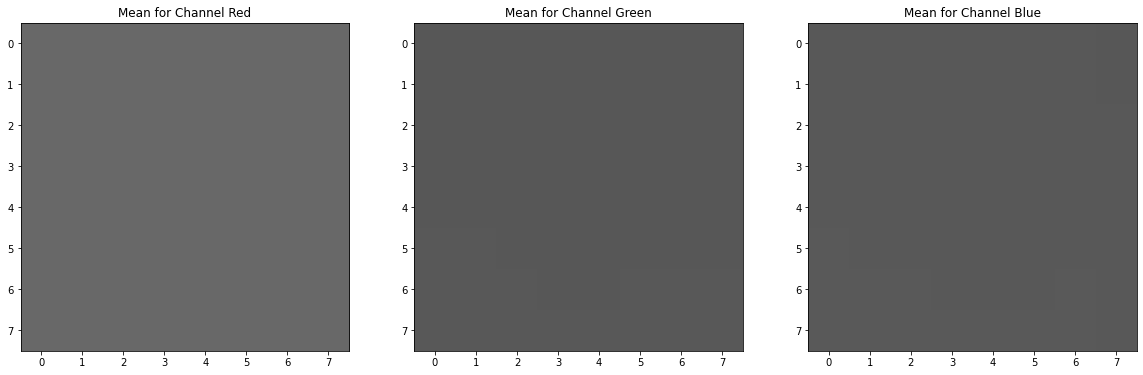

In [22]:
fig, ax = plt.subplots(1, 3)
for i, color in enumerate(["Red", "Green", "Blue"]):
    ax[i].imshow(data_patch_mean_list[i].reshape(8,8), vmin=0 , vmax=255, cmap="gray")

    ax[i].set_title(f"Mean for Channel {color}")
    
fig.set_size_inches(20,50)
plt.show()

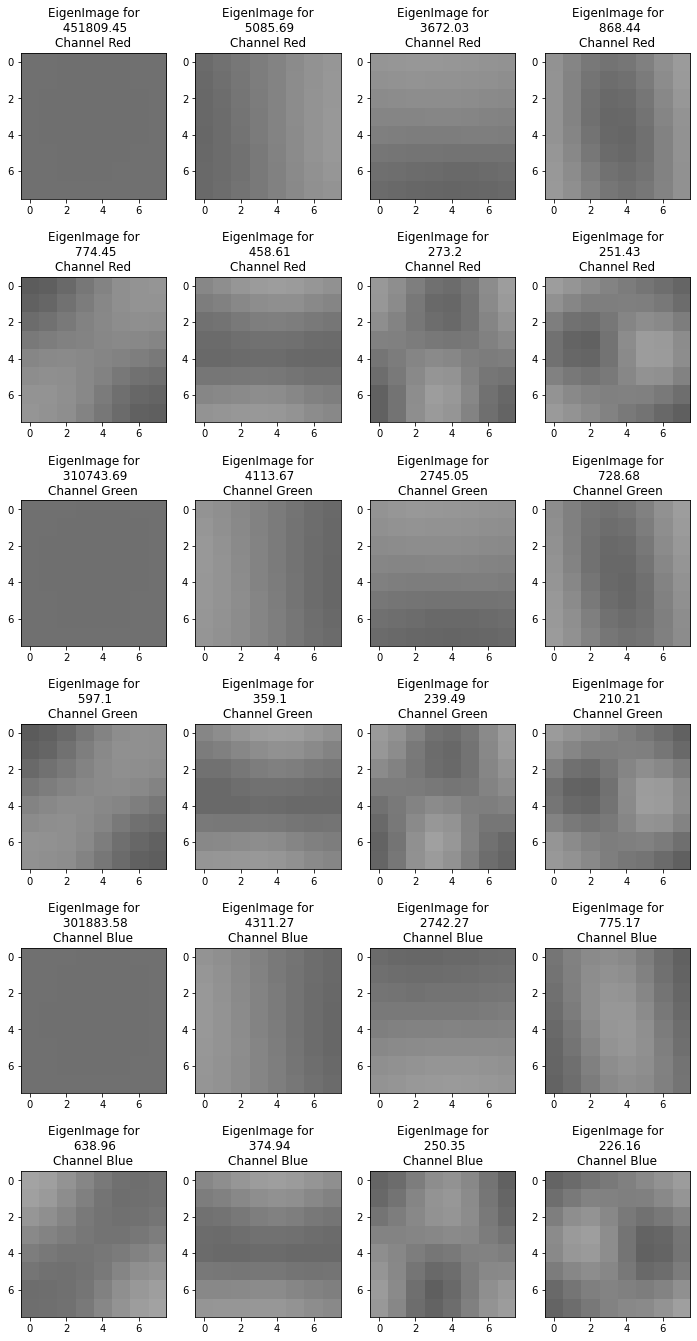

In [23]:
fig, ax = plt.subplots(3*2, 4)

for i in range(24):
    if int(i/8)==0:
        color = "Red"
    elif int(i/8)==1:
        color = "Green"
    else:
        color = "Blue"
    
    ax[int(i/4)][i%4].imshow(e_vectors_list[int(i/8)][:,i%8].reshape(8,8), vmin=-1, vmax=+1, cmap='gray')
    ax[int(i/4)][i%4].set_title(f"EigenImage for\n {e_values_list[int(i/8)][i%8].round(2)}\nChannel {color}")
fig.set_size_inches(12,24)    
plt.show()

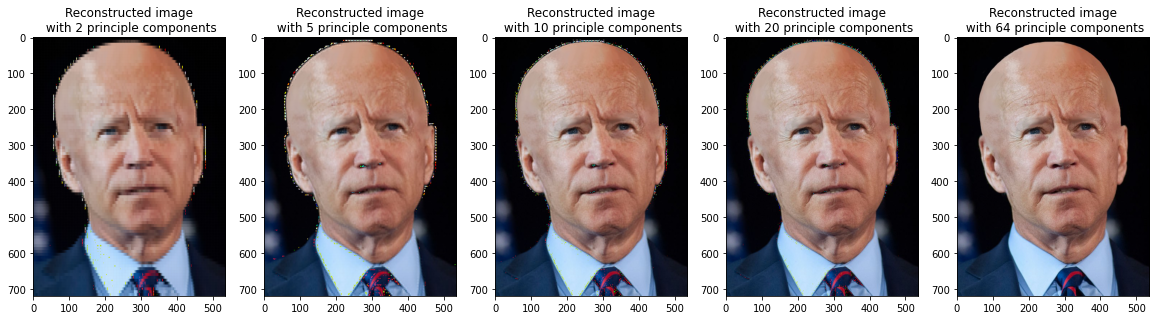

In [24]:
fig, ax = plt.subplots(1, 5)
for i, k in enumerate([2, 5, 10, 20, 64]):
    data_img_reconstructed_list = []
    for channel in range(3):
        data_patch_redueced = data_patch_transformed_list[channel][:k,:]

        data_patch_reconstructed = e_vectors_list[channel][:, :k] @ data_patch_redueced + data_patch_mean_list[channel]

        data_img_reconstructed = patch_reconstruct(data_patch_reconstructed, data_img_shape)
        data_img_reconstructed_list.append(data_img_reconstructed)
        
    ax[i].imshow(np.dstack(data_img_reconstructed_list).astype(np.uint8))
    ax[i].set_title(f"Reconstructed image\n with {k} principle components")
    
fig.set_size_inches(20,50)
plt.show()